https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/yaya/Desktop/Machine Learning/Heart-Attack-Analysis-and-Prediction/Dataset/heart.csv")

| Domain Knowledge



**Age :** 
This is a key risk factor for heart disease. As age increases, the risk of damaged and narrowed arteries, weakened or thickened heart muscle, and other heart disease risk factors also increases.

**Sex :** 
Men are generally at higher risk of heart disease than women. However, after menopause, a woman's risk increases to almost match that of a man's.

**Chest Pain Type (cp) :** 
Chest pain is a key symptom of heart disease. It may manifest in different forms: typical angina, atypical angina, non-anginal pain, or may even be asymptomatic. Chest pain associated with heart disease is usually described as a discomfort, heaviness, pressure, aching, burning, fullness, squeezing, or painful feeling.

**Resting Blood Pressure (trtbps) :** 
High blood pressure (hypertension) can harden and thicken arteries, leading to a buildup of plaque (atherosclerosis) that can cause coronary artery disease. The pressure is measured in millimeters of mercury (mm Hg) and is usually recorded as two figures. Normal resting blood pressure in an adult is approximately 120/80 mm Hg.

**Serum Cholesterol (chol) :** 
Cholesterol is a type of lipid molecule. High levels of low-density lipoprotein (LDL) or 'bad cholesterol' can increase the risk of heart disease by forming plaques and narrowing arteries.

**Fasting Blood Sugar (fbs) :** 
High fasting blood sugar levels (prediabetes or diabetes) can contribute to narrowing of the arteries and increase the risk of heart disease. A fasting blood sugar level less than 100 mg/dL is considered normal. 100-125 mg/dL is considered prediabetes, and 126 mg/dL or higher on two separate tests means you have diabetes.

**Resting Electrocardiographic Results (restecg) :** 
ECG records the electrical activity of the heart and can show previous heart attacks or problems with the heart rhythm. Abnormal results can indicate heart conditions such as left ventricular hypertrophy or heart arrhythmias.

**Maximum Heart Rate Achieved (thalachh) :** 
During exercise or stress testing, the maximum heart rate can indicate cardiovascular fitness and the heart's ability to handle exertion.

**Exercise Induced Angina (exang) :** 
This happens when the heart muscle doesn't get as much blood (and thus oxygen) as it needs for the level of physical activity, causing chest pain or discomfort.

**ST Depression Induced by Exercise Relative to Rest (oldpeak) :** 
Changes in the ST segment on an ECG can indicate heart disease. ST depression can indicate ischemia, or lack of sufficient blood flow to the heart muscle.

**The Slope of The Peak Exercise ST Segment (slp) :** 
The ST segment/heart rate slope (ST/HR slope), has been introduced as an index of relative myocardial oxygen demand during exercise. The shape of the ST segment can reveal a lot about the heart's condition.

**Number of Major Vessels Colored by Flourosopy (caa) :** 
This measures the presence of disease in the major blood vessels to the heart. A higher number usually indicates more severe disease.

**Thallium Stress Test (thall) :** 
This is a nuclear imaging method that shows how well blood flows into the heart muscle, both at rest and during activity. It can reveal areas of the heart muscle that aren't receiving enough blood, indicating coronary artery disease.

**Output (Diagnosis of Heart Disease) :** 
This is the target variable. A value of 0 indicates less than 50% diameter narrowing - not a significant heart disease, while a value of 1 indicates more than 50% diameter narrowing - a significant heart disease.

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [30]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"{column} : {unique_values}")

age : 41
sex : 2
cp : 4
trtbps : 49
chol : 152
fbs : 2
restecg : 3
thalachh : 91
exng : 2
oldpeak : 40
slp : 3
caa : 5
thall : 4
output : 2


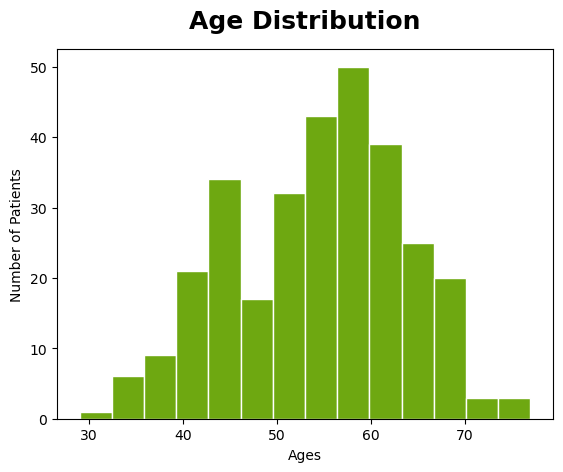

In [4]:
plt.hist(df['age'], bins=14, color='#6EA811', ec='white')
plt.title("Age Distribution",fontweight='bold', fontsize=18, pad=15)
plt.xlabel("Ages")
plt.ylabel("Number of Patients");

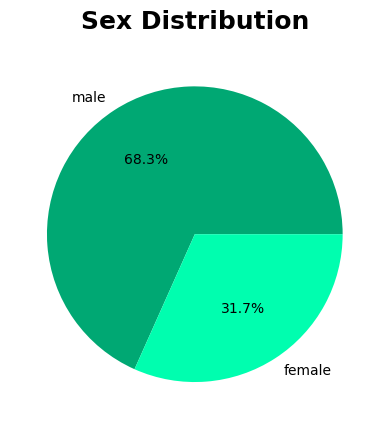

In [5]:
sex_lables = {1: 'male', 0: 'female'}
sex = df['sex'].map(sex_lables)

fig, ax = plt.subplots()
plt.title("Sex Distribution", fontweight='bold', fontsize=18, pad=15)
ax.pie(sex.value_counts(), labels=sex.value_counts().index, autopct='%1.1f%%', colors=['#00A873', '#00FEAF']);

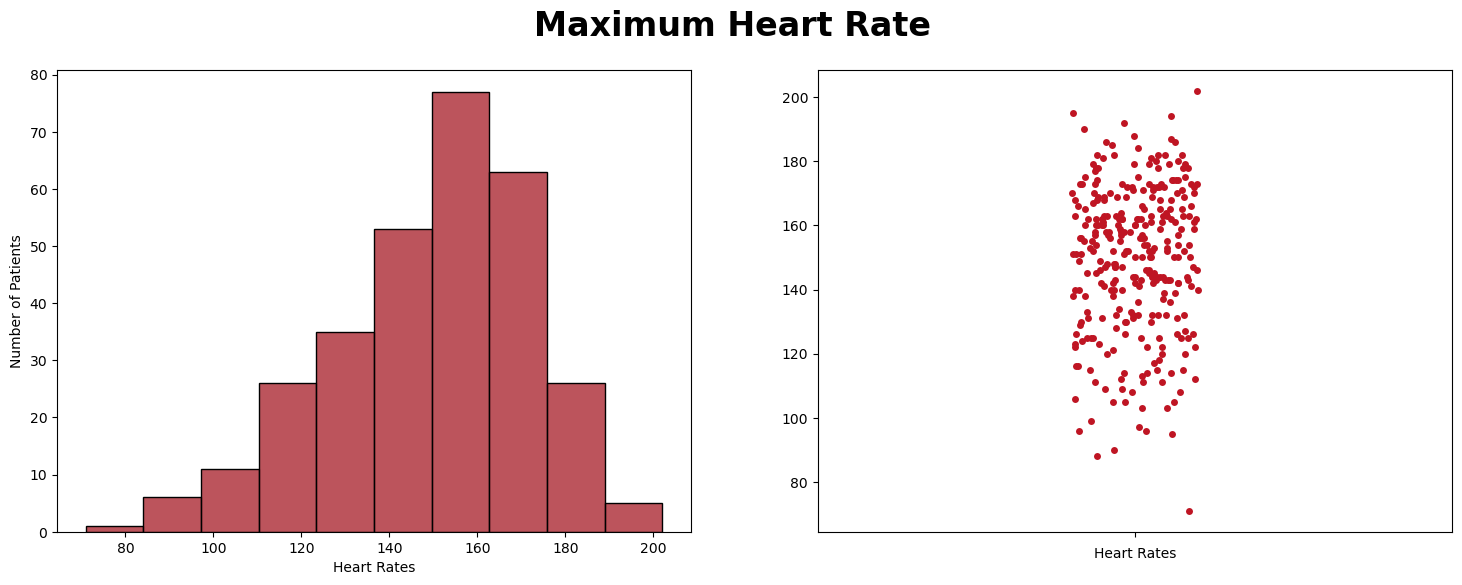

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

sns.histplot(df['thalachh'], ax=ax1, bins=10, color='#A61B26')
ax1.set_xlabel('Heart Rates')
ax1.set_ylabel('Number of Patients')

sns.stripplot(df['thalachh'], ax=ax2, color='#BF1523')
ax2.set_xlabel('Heart Rates')
ax2.set_ylabel('')

fig.suptitle("Maximum Heart Rate",fontweight='bold', fontsize=24);

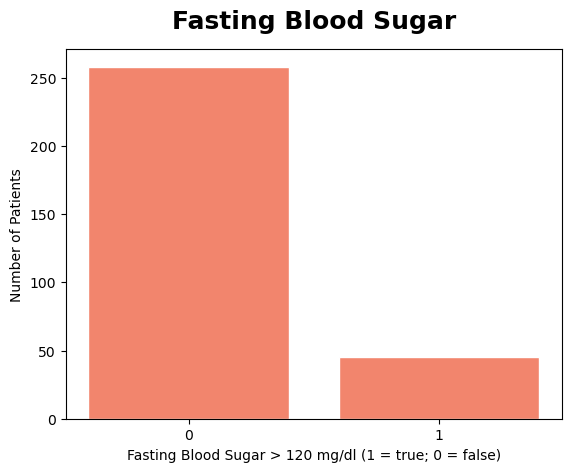

In [79]:
plt.bar(df['fbs'].value_counts().index, df['fbs'].value_counts().values, color='#F2856D', ec='white')
plt.title("Fasting Blood Sugar",fontweight='bold', fontsize=18, pad=15)
plt.xlabel("Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)")
plt.ylabel("Number of Patients")
plt.xticks(df['fbs'].value_counts().index);

In [8]:
df['thall'].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [3]:
df['thall'] = df['thall'].replace(0,2)

In [34]:
thall_mapping = {1: 'fixed defect', 2: 'normal', 3: 'reversible defect'}
stress_test_mapp = df['thall'].map(thall_mapping)

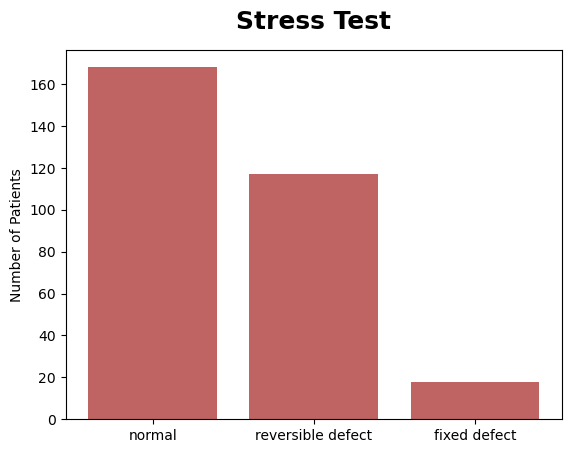

In [78]:
plt.bar(stress_test_mapp.value_counts().index, stress_test_mapp.value_counts().values, color='#BF6363')
plt.title("Stress Test", fontweight='bold', fontsize=18, pad=15)
plt.ylabel("Number of Patients");

In [63]:
cp_mapping = {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'}
chest_pain_type = df['cp'].map(cp_mapping)

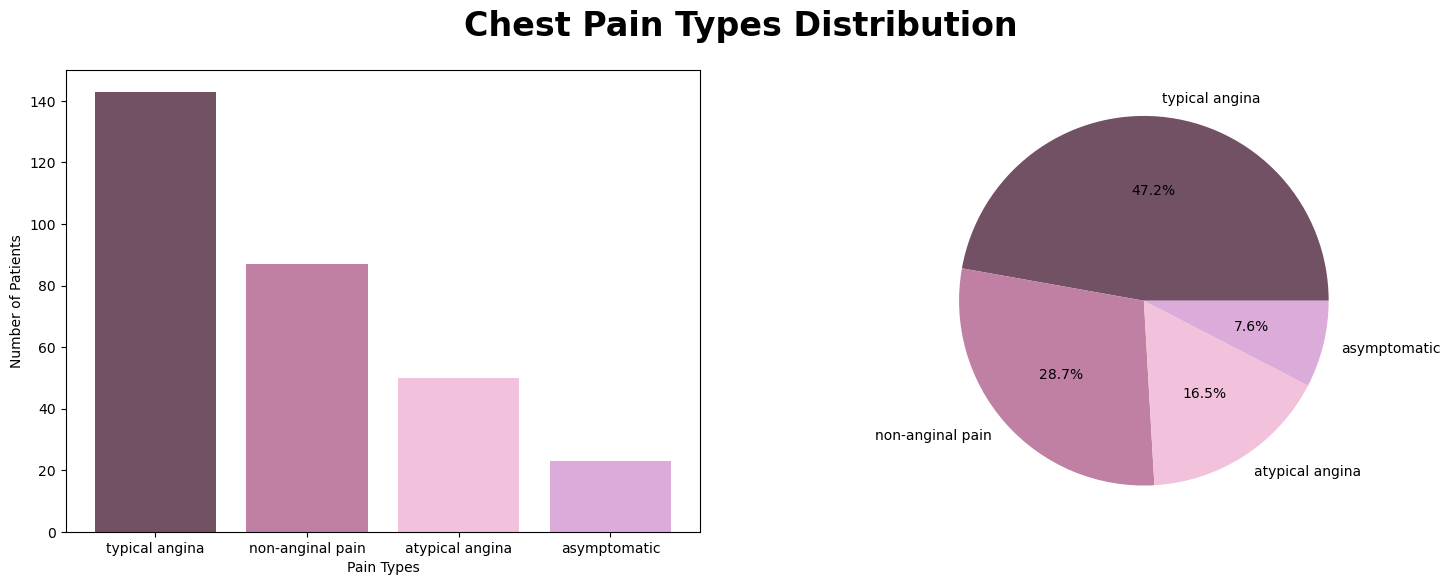

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

bar_colors = ['#735164', '#BF80A3','#F2C2DC','#DBABDA']
ax1.bar(chest_pain_type.value_counts().index, chest_pain_type.value_counts().values, color=bar_colors)
ax1.set_xlabel('Pain Types')
ax1.set_ylabel('Number of Patients')

ax2.pie(chest_pain_type.value_counts(), 
        labels=chest_pain_type.value_counts().index, 
        autopct='%1.1f%%', 
        colors=['#735164', '#BF80A3','#F2C2DC','#DBABDA'])

fig.suptitle("Chest Pain Types Distribution", fontweight='bold', fontsize=24);

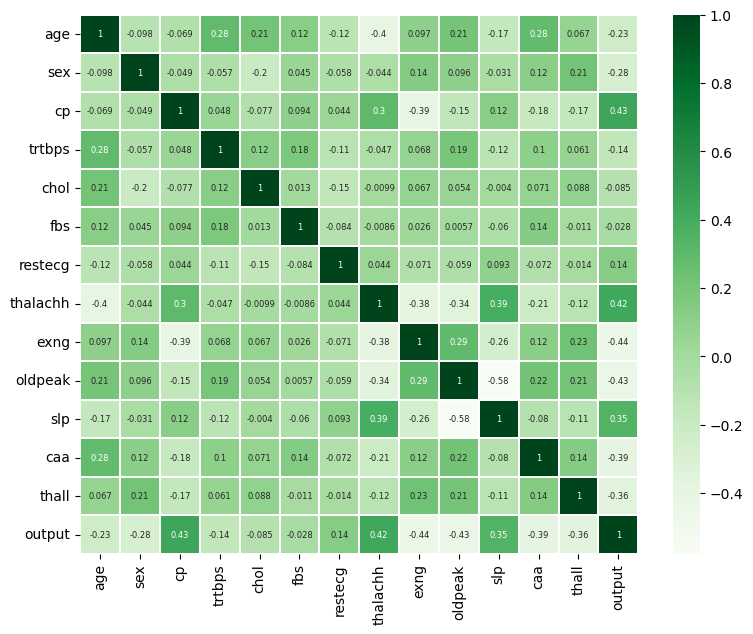

In [32]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 6}, cmap='Greens', linewidths=0.1);

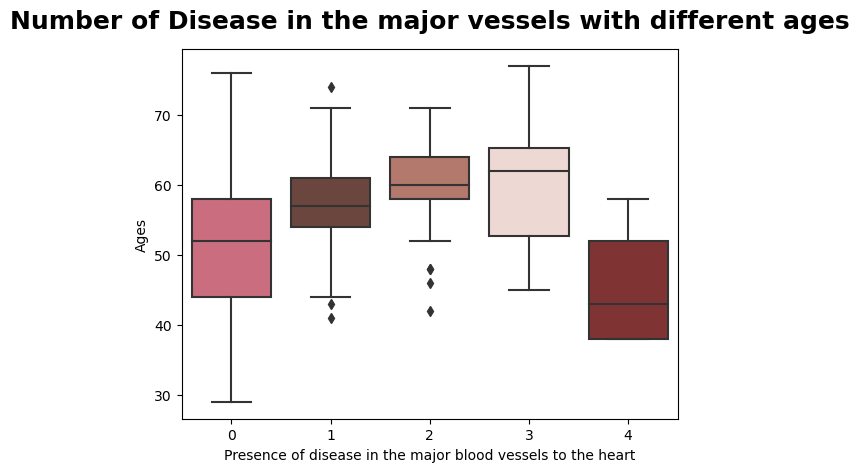

In [106]:
colors = ['#D95F76', '#734136','#BF7160','#F2D5CE', '#8C2626']
sns.boxplot(x='caa', y='age', data=df, palette=colors)
plt.title('Number of Disease in the major vessels with different ages', fontweight='bold', fontsize=18, pad=15)
plt.xlabel('Presence of disease in the major blood vessels to the heart')
plt.ylabel('Ages');

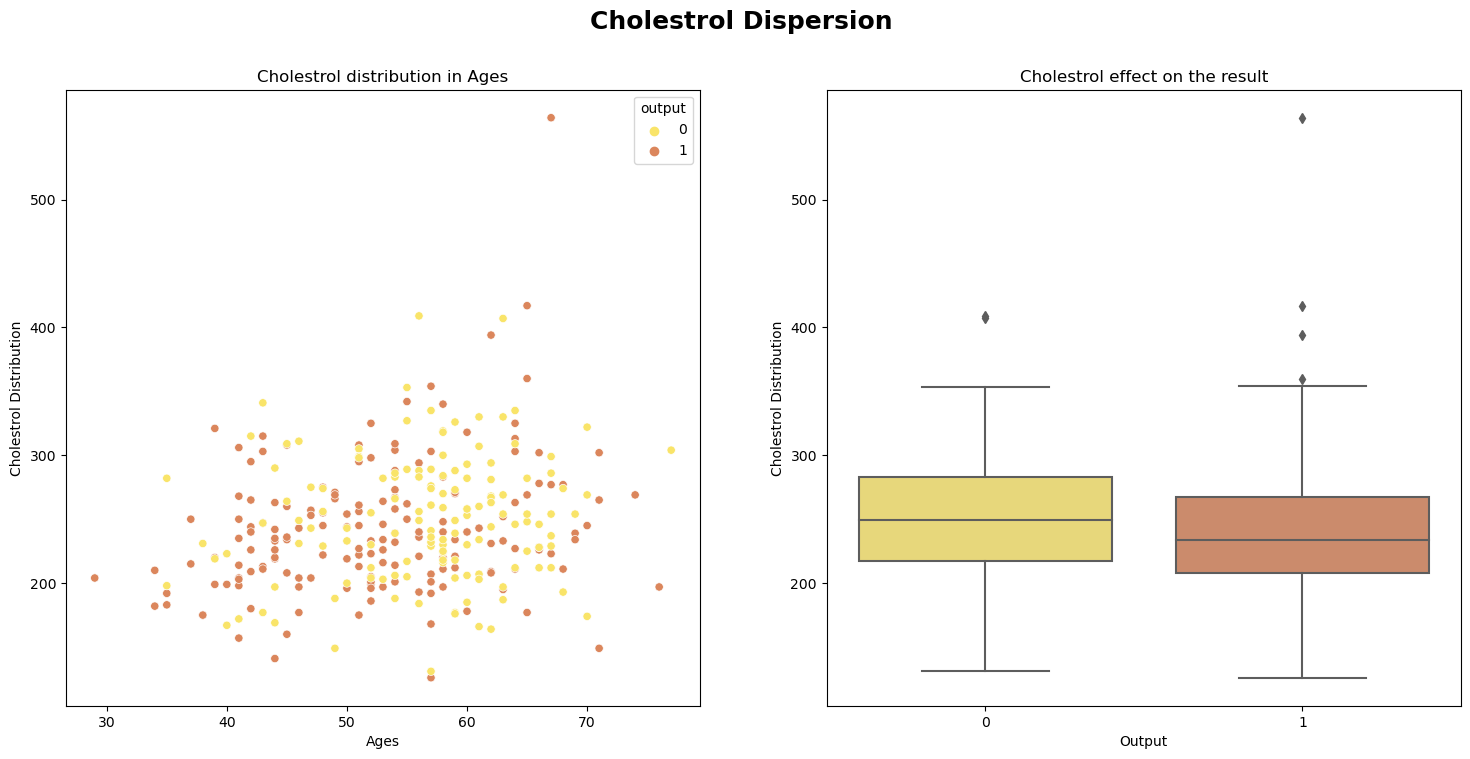

In [52]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))

colors = ['#F9E469', '#DB865C']
fig.suptitle('Cholestrol Dispersion', fontweight='bold', fontsize=18)

sns.scatterplot(x='age', y='chol', data=df, ax=axs[0], hue='output', palette=colors)
axs[0].set(title='Cholestrol distribution in Ages')
axs[0].set_ylabel('Cholestrol Distribution')
axs[0].set_xlabel('Ages')

sns.boxplot(x='output', y='chol', data=df, ax=axs[1], palette=colors)
axs[1].set(title='Cholestrol effect on the result')
axs[1].set_ylabel('Cholestrol Distribution')
axs[1].set_xlabel('Output');

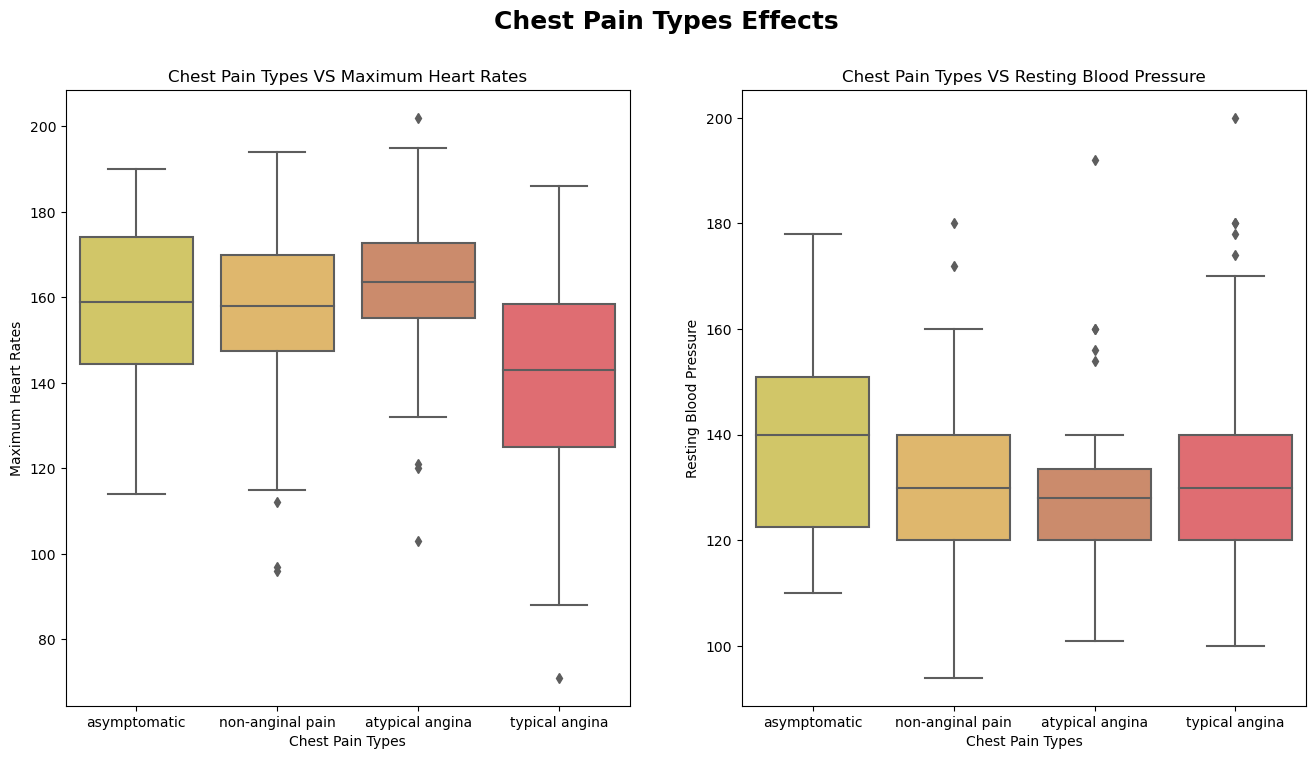

In [83]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
fig.suptitle('Chest Pain Types Effects', fontweight='bold', fontsize=18)

colors = ['#E3D456', '#F2BD5A', '#DB865C', '#F25A61']

sns.boxplot(x=chest_pain_type, y=df['thalachh'],ax=axs[0], palette=colors)
axs[0].set(title='Chest Pain Types VS Maximum Heart Rates')
axs[0].set_ylabel('Maximum Heart Rates')
axs[0].set_xlabel('Chest Pain Types')

sns.boxplot(x=chest_pain_type, y=df['trtbps'],ax=axs[1], palette=colors)
axs[1].set(title='Chest Pain Types VS Resting Blood Pressure')
axs[1].set_ylabel('Resting Blood Pressure')
axs[1].set_xlabel('Chest Pain Types');

ValueError: Grouper and axis must be same length

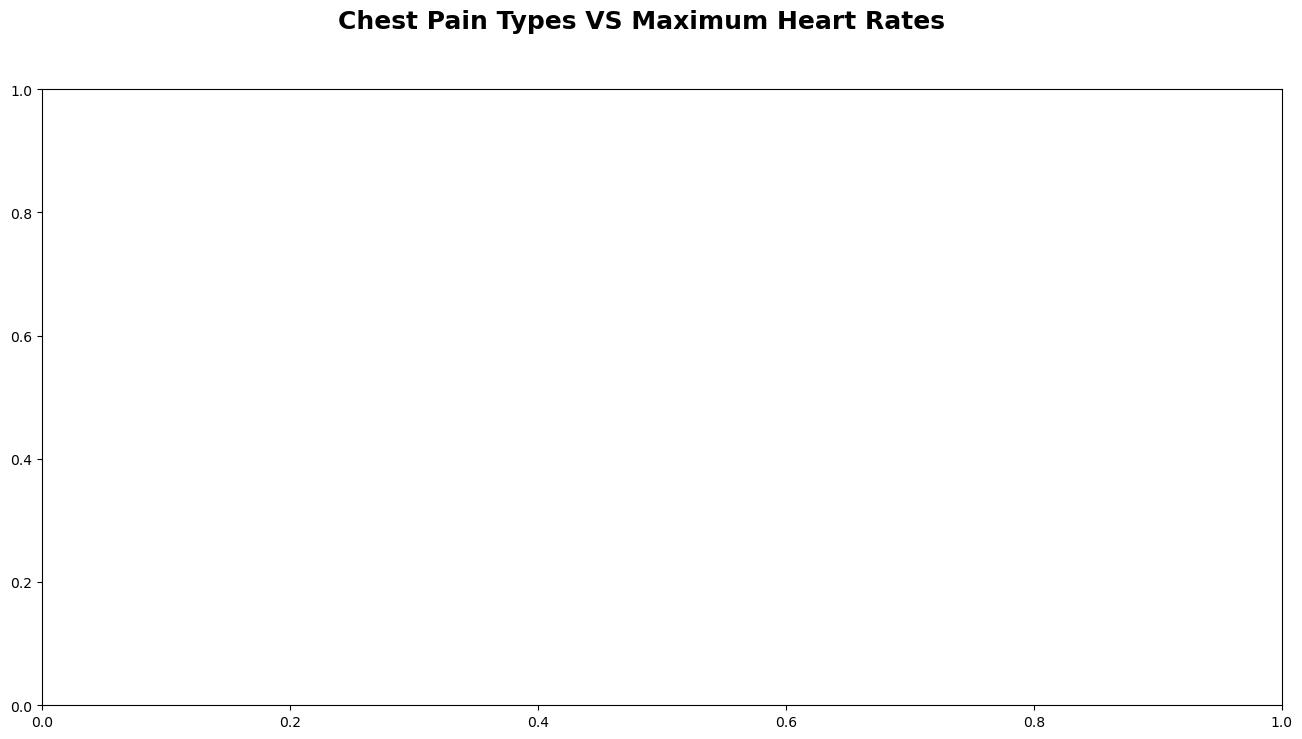

In [102]:
fig, axs = plt.subplots(ncols=1, figsize=(16,8))
fig.suptitle('Chest Pain Types VS Maximum Heart Rates', fontweight='bold', fontsize=18)

colors = ['#E3D456', '#F2BD5A', '#DB865C', '#F25A61']

sns.barplot(x=df['caa'].value_counts().index, y=df['sex'], hue=df['fbs'], palette=colors)
plt.xlabel('Chest Pain Types')
plt.ylabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)');